<a href="https://colab.research.google.com/github/athiq-ahmed/Data-science/blob/master/Stacking_Ensemble_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stacked Generalization

* Unlike bagging, in stacking, the models are typically different (e.g. not all decision trees) and fit on the same dataset (e.g. instead of samples of the training dataset).

* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).

* The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.

* Level-0 Models (Base-Models): Models fit on the training data and whose predictions are compiled.
Level-1 Model (Meta-Model): Model that learns how to best combine the predictions of the base models.

* The meta-model is trained on the predictions made by base models on out-of-sample data. That is, data not used to train the base models is fed to the base models, predictions are made, and these predictions, along with the expected outputs, provide the input and output pairs of the training dataset used to fit the meta-model.

* The outputs from the base models used as input to the meta-model may be real value in the case of regression, and probability values, probability like values, or class labels in the case of classification.

* The most common approach to preparing the training dataset for the meta-model is via k-fold cross-validation of the base models, where the out-of-fold predictions are used as the basis for the training dataset for the meta-model.

* The training data for the meta-model may also include the inputs to the base models, e.g. input elements of the training data. This can provide an additional context to the meta-model as to how to best combine the predictions from the meta-model.

* Once the training dataset is prepared for the meta-model, the meta-model can be trained in isolation on this dataset, and the base-models can be trained on the entire original training dataset.

In [1]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


### Stacking for Classification

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [5]:
X[:3]

array([[-4.90644173,  3.44278902,  0.55896373, -0.97676364, -1.56880543,
        -4.27198221, -3.72792096,  0.11186836,  2.11979508, -2.52281204,
         3.35228081, -7.49247833,  4.26466854,  0.30486563,  0.77769294,
        -9.37546378,  1.65444574,  3.01285895, -4.4970026 , -2.52006572],
       [ 2.16261046, -5.2866508 ,  2.60984566, -1.80389839, -1.83121562,
         1.45075743,  2.64870874,  2.15230694,  0.52455214,  0.49354757,
        -1.40180947,  6.68060317, -2.43182999,  2.46277341, -1.25482394,
         2.97840185, -3.42845688, -4.56217784,  3.69866457, -1.92328575],
       [-4.78484428, -3.74482699,  4.65759163, -1.40880597, -5.44475753,
        -2.41601307,  3.55649527, -1.57211894, -0.7305487 ,  3.44766104,
        -2.60905175,  7.96105921, -5.15110508,  0.47313097, -4.07066651,
        -0.93230941, -3.23076843, -7.8446457 ,  2.80379841, -2.96318945]])

In [6]:
y[:3]

array([0, 1, 1])

In [9]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [10]:
def get_dataset():
  X,y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
  return X, y

In [20]:
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  return models

In [21]:
def evaluate_model(model, X, y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

In [22]:
X, y = get_dataset()
print(X.shape, y.shape)

models = get_models()

(1000, 20) (1000,)


lr 0.810 (0.033)
knn 0.927 (0.028)
cart 0.792 (0.037)
svm 0.943 (0.022)
bayes 0.789 (0.044)


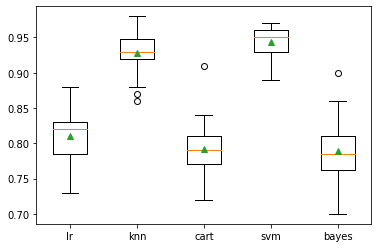

In [25]:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('%s %.3f (%.3f)' %(name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [41]:
from sklearn.ensemble import StackingClassifier

def get_stacking():
  level0 = list()
  level0.append(('lr', LogisticRegression()))
  level0.append(('knn', KNeighborsClassifier()))
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('svm', SVC()))
  level0.append(('bayes', GaussianNB()))

  level1 = LogisticRegression()

  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

In [42]:
def get_models():
  models = dict()
  models['lr'] = LogisticRegression()
  models['knn'] = KNeighborsClassifier()
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
  models['stacking'] = get_stacking()
  return models

In [43]:
X, y = get_dataset()
print(X.shape, y.shape)

models = get_models()
print(list(models))

(1000, 20) (1000,)
['lr', 'knn', 'cart', 'svm', 'bayes', 'stacking']


lr 0.810 (0.033)
knn 0.927 (0.028)
cart 0.787 (0.040)
svm 0.943 (0.022)
bayes 0.789 (0.044)
stacking 0.943 (0.023)


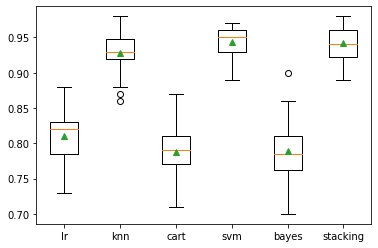

In [44]:
results, names = list(), list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(scores)
  names.append(name)
  print('%s %.3f (%.3f)' %(name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [46]:
model.fit(X, y)

StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('knn',
                                KNeighborsClassifier(algorithm='auto',
                                 

In [47]:
# make a prediction for one example
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]
yhat = model.predict(data)
print('Predicted Class: %d' % (yhat))

Predicted Class: 0


### Stacking for Regression

>knn -101.019 (7.161)
>cart -147.580 (12.500)
>svm -162.419 (12.565)


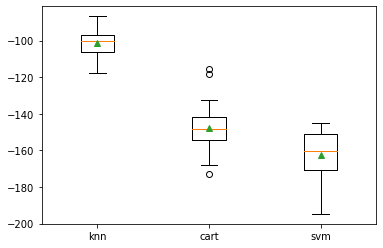

In [48]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>knn -101.019 (7.161)
>cart -148.877 (10.607)
>svm -162.419 (12.565)
>stacking -56.657 (5.152)


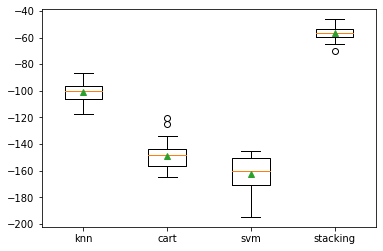

In [49]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# get the dataset
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
	return X, y

# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [50]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
# define the base models
level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X, y)
# make a prediction for one example
data = [[0.59332206,-0.56637507,1.34808718,-0.57054047,-0.72480487,1.05648449,0.77744852,0.07361796,0.88398267,2.02843157,1.01902732,0.11227799,0.94218853,0.26741783,0.91458143,-0.72759572,1.08842814,-0.61450942,-0.69387293,1.69169009]]
yhat = model.predict(data)
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 557.499


Ref: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/